In [21]:
#!pip install sqlalchemy pandas mlxtend seaborn
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of V31Apriori failed: Traceback (most recent call last):
  File "/Users/rabauti/repos/tu/estnltk/syntax_experiments__verb_templates/venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rabauti/repos/tu/estnltk/syntax_experiments__verb_templates/venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/rabauti/repos/tu/estnltk/syntax_experiments__verb_templates/venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/rabauti/repos/tu/estnltk/syntax_experiments__verb_templates/venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 335, in update_class
    if (old_obj == new_obj) is True:
        ^^^^^^^^^^^^^^^^^^
  File "/Users/rabauti/repos/tu/estnltk/syntax_experiments__verb_templates/venv/lib/python3.11

# Verbimallid apriori
* v31 
  * verbi relatsioonid ei sisalda enam ebaolulisi deprel-e
  * lisaks verbi otsestele alluvatele sisalduvad andmebaasis ka verbile alluvate obl-de alluvad case-tipud.
* v30 algne 

## Ülesande esialgne kirjeldus Svenilt
1. Transaktsioonide sisu filtreerimine
    - Kadrit ei huvita vebile alluvad kirjavahemärgid
    - Kadrit ei huvita verbile alluv kõrvallause.
      (ma sõin putru ja vaatasin televiisorit) 
      Vastav alampuu on spetsiifilise deprel nimega (sinu näites cc ja veel ka conj)
      Kontrolli seda ise vaadates erinevaid liitlauseid läbi. Kadri saab sind selles osas aidata
   - Vaata et transaktsiooni ei jääks ühendverbi liite osa (kirjutas maha --> maha), sest see on müra

2. Transaktsiooni item-ite moodustamine
    - Kadri meelest pole ainuse ja mitmuse eristamine oluline välja arvatud subject/objekt tippudes
    - Item peaks olema deprel + form. 
      Sul on mingit tipud deprel + form1, form2 kuidas see tekkida sai
      Näiteks {'deprel': 'nsubj', 'feats': 'com,nom,sg'} -- kas see on mitmene morf analüüs? Kui jah, kas sa saad siis com | nom kasutada
- sõnavormide lisamine item-i sisse. 
Võiks olla mingi lävend, et kui sõnavorm on antud deprel-i all sagedamini kui 20% siis jääb see ka alles
magas und --> und on obj ja peaaegfu ainus võimalik obj verbiga magama


3. Itemset mining. Sellele on vaja peale visata almost-closed set filter
 
Sa hakkad tulemusi vaatama kõige pikematest alamhulkadest


Olgu sul pikk alamhulk X sagedusega t_X ja olgu Y selle ühe itemiga vähem hulk st Y + {a} = X 
Siis tuleb hulk Y kustutada kui selle sagedus t_y >= t_x - delta, kus delta on mingi lävend
Standard juhul on delta=0, aga meie rakenduses võiks delta olla 2-5% kui sa mõõdad sagedust protsentides


Kui sa nii, kontrollid elementide arvu järgi tagurpidiselt järjestatud hulki, saad kompaktse esituse, mida meil vaja on


4. Tulemuse esitus


Graafiline heatmap, Pane allesjäänud hulgad 0/1 kodeeringus heatmapile


Järjestus peaks olema SUB, OBJ, OBL1, ...OBLx, muud
Kadri annab täpse järjestuse





## Märkused

* compound:prt-d alluvat ei ignoreerita kui compound=None
* andmestikust on müra eemaldatud Kadri poolt etteantud nimekirja alusel
* andmebaas sisaldab ka selliseid transaction_head kirjeid, millel pole ühtegi relevantset alluvat

## TODO!
*  Järjestada liikmed Kadri etteantud järjekorras (kas sõnad näidetes tuleb järestada ka vastavalt?).
*  Parandada apriori tulemuse filtreerimine protsendi järgi


# Algseadistamine

In [22]:
DB_FILE = "/Users/rabauti/repos/tu/estnltk/syntax_experiments__verb_templates/verb_transactions/v31/v31_koondkorpus_sentences_verb_pattern_obl_20240524-153036.db"

In [23]:
from V31Apriori import V31
import pandas as pd
pd.set_option('display.max_colwidth', 0)

v31 = V31(
    DB_FILE,
    form_treshold_percent = 20,
    form_treshold_count = 5,
    apriori_min_support=0.05,
    apriori_treshold_delta = 0.03,
    apriori_treshold_percent=50,
    datarows_treshold=100000
    )

## vaidlema

************************************************ vaidlema   ************************************************
Ridu analüüsimiseks: 3598
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
5,0.669817,"[(NSUBJ, nom, , )]",sa,see,keegi,False,,1
1,0.394942,"[(ADVMOD, , , )]",kaua,alati,seega,False,,1
13,0.267093,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",hiinlased nii,kes omavahel,poliitikud siiski,False,,2
9,0.234297,"[(OBL, gen, , üle)]",mille üle,küsimuse üle,sõnastuse üle,False,,1
19,0.180100,"[(NSUBJ, nom, , ), (OBL, gen, , üle)]",valitsus müügi üle,ta logode üle,ma selle üle,False,,2
11,0.157310,"[(OBL, kom, , )]",riigiga,torpedoga,meiega,False,,1
3,0.141745,"[(AUX, , ei, )]",ei,ei,ei,False,,1
2,0.123680,"[(AUX, , , )]",ära,on,ära,False,,1
14,0.106726,"[(OBL, gen, , üle), (ADVMOD, , , )]",selle üle tavaliselt,selle üle siiani,asukoha üle jälle,True,(row 21) delta: abs(0.0864 - 0.1067) < 0.03 %: (0.1067-0.0864)/0.0864*100<50,2
17,0.101167,"[(NSUBJ, nom, , ), (AUX, , ei, )]",keegi ei,politsei ei,ma ei,False,,2


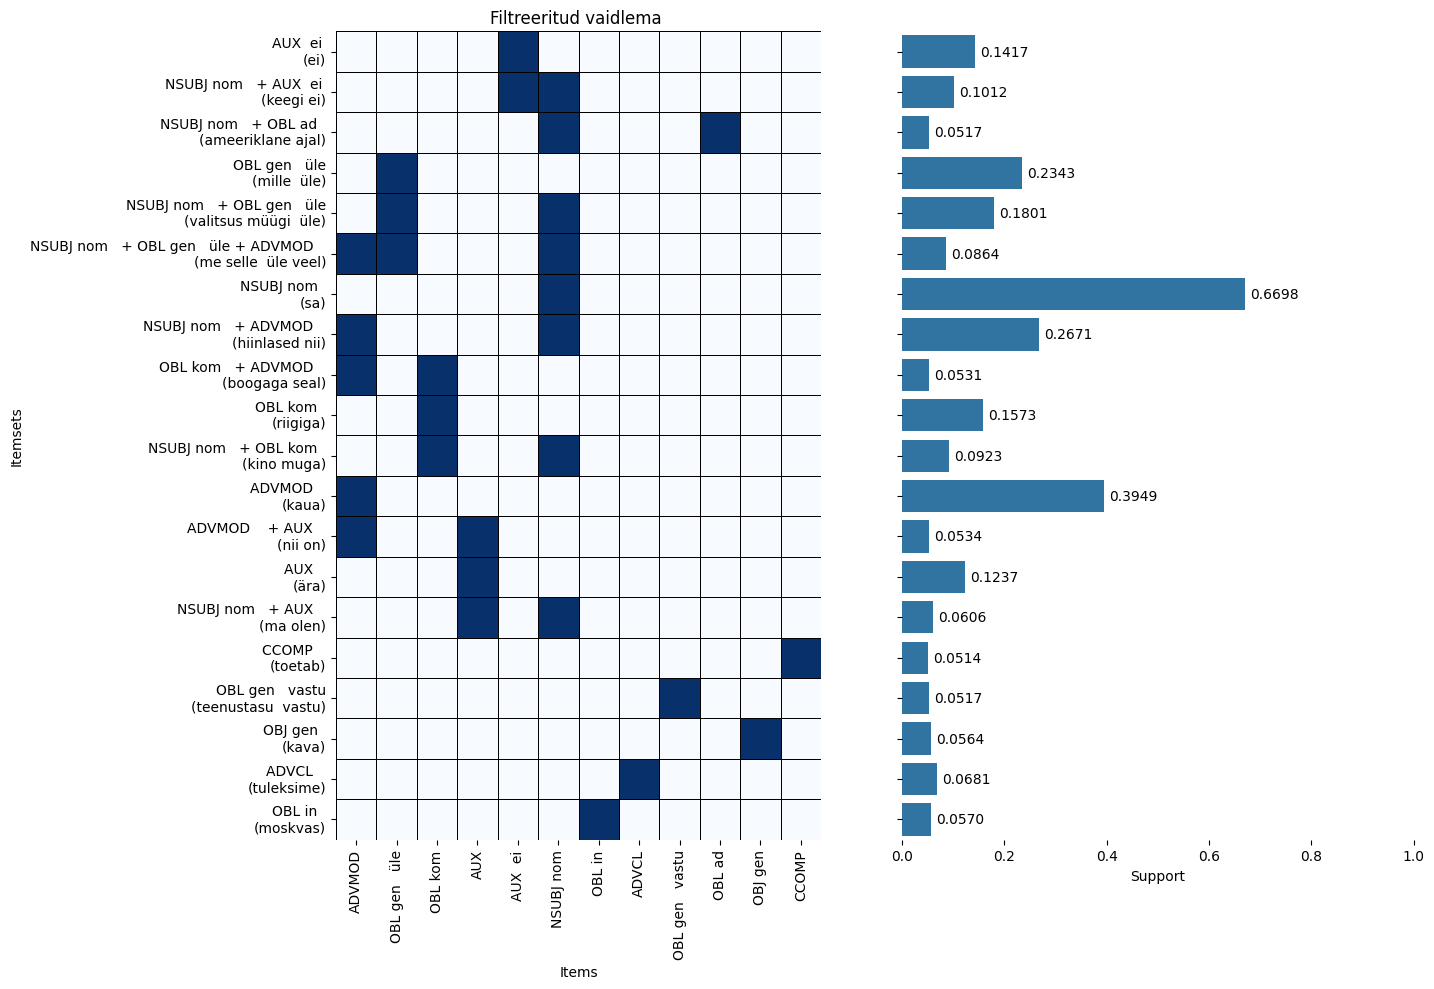

CPU times: user 5.65 s, sys: 2.38 s, total: 8.02 s
Wall time: 15.1 s


In [24]:
%%time
result = v31.make_all(verb='vaidlema', verb_compound='', examples=True)
